In [1]:
import pandas as pd

data = pd.read_csv("./data/scores.csv")

In [8]:
data_subsection = data[['username', 'subreddit', 'score']]
users, subreddits, scores = data_subsection.values.T
karma_dict = {}
for i in range(len(data_subsection)):
    user,subreddit,score = users[i], subreddits[i], scores[i]
    if user not in karma_dict:
        karma_dict[user] = {}

    if subreddit not in karma_dict[user]:
        karma_dict[user][subreddit] = 0
    
    karma_dict[user][subreddit] += score

karmas = []
for i in range(len(data_subsection)):
    user, subreddit, score = data_subsection.iloc[i].values
    karmas.append(karma_dict[user][subreddit])

data['karma'] = karmas

In [7]:
karma_dict

{'laserfartt': {'changemyview': 18,
  'letstalkmusic': 33,
  'ifyoulikeblank': 23,
  'decaf': 2,
  'campinggear': 1,
  'hardwareswap': 10,
  'malefashionadvice': 2},
 'automoderator': {'nyc_sublets': 1,
  'puravive_review': 18,
  'whatthefrockk': 1,
  'debriefingroom': 1,
  'project2025award': 1,
  'algotrading': 1,
  'giggsterhosts': 1,
  'giggsterhq': 1,
  'devsarg': 4,
  'witch': 1,
  'bjj': 2,
  'shroomstocks': 1,
  'statisticshomework': 12,
  'pornrelapsed': 1,
  'askto': 2,
  'toronto': 1,
  'monopoly_go': 30,
  'friendsofthepod': 1,
  'globaloffensive': 1,
  'renoquebec': 1,
  'friendlymonarchs': 1,
  '24election': 1,
  'findaleague': 1,
  'perfectmatchnetflix': 1,
  'recruiting': 1,
  'varessellers': 2,
  'redditlaqueristas': 1,
  'step1': 1,
  '2diplomatic4u': 1,
  'colts': 1,
  'shortswatters': 1,
  'phillyunion': 1,
  'untappd': 1,
  'nygiants': 1,
  'runescapemerchanting': 1,
  'samsung': 1,
  'elegibilidadedejair': 1,
  'internationalteachers': 1,
  'savannahsoto': 1,
  'b

In [4]:
users

array(['laserfartt', 'laserfartt', 'laserfartt', ..., 'therazorx',
       'therazorx', 'therazorx'], dtype=object)

In [51]:
list(data.columns)

['username',
 'karma',
 'label',
 'subreddit',
 'title',
 'selftext',
 'score',
 'num_comments',
 'posted_time',
 'bias_authority',
 'bias_care',
 'bias_fairness',
 'bias_sanctity',
 'bias_loyalty',
 'intensity_authority',
 'intensity_care',
 'intensity_fairness',
 'intensity_sanctity',
 'intensity_loyalty',
 'authority.vice',
 'authority.virtue',
 'care.virtue',
 'care.vice',
 'fairness.vice',
 'fairness.virtue',
 'sanctity.vice',
 'sanctity.virtue',
 'loyalty.vice',
 'loyalty.virtue']

The average karma per user

The average karma of a post per user per subreddit

ImportError: cannot import name 'read_json' from 'utils' (c:\Users\Administrator\Desktop\rps\utils\__init__.py)

In [52]:
filtered = data[data["subreddit"].isin(["conservative", "progressive", "republican", "wayofthebern"])].dropna()
filtered_group = filtered.groupby(by=["username", "subreddit"])["karma"].mean().reset_index()
filtered_group

,username,subreddit,karma
0,10art1,wayofthebern,5.0
1,22leema,wayofthebern,24.0
2,2salmon4u,wayofthebern,111.0
3,3andfro,wayofthebern,13.0
4,49ermagic,conservative,85.0
...,...,...,...
394,yanggangkricx,wayofthebern,4.0
395,yosoff,republican,20.0
396,zachmode,conservative,88.0
397,zgylthz,wayofthebern,27.0


c:\ProgramData\miniconda3\envs\emfd\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\miniconda3\envs\emfd\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11476\34160411.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="subreddit", y="karma", data=filtered_group, palette="Set2")


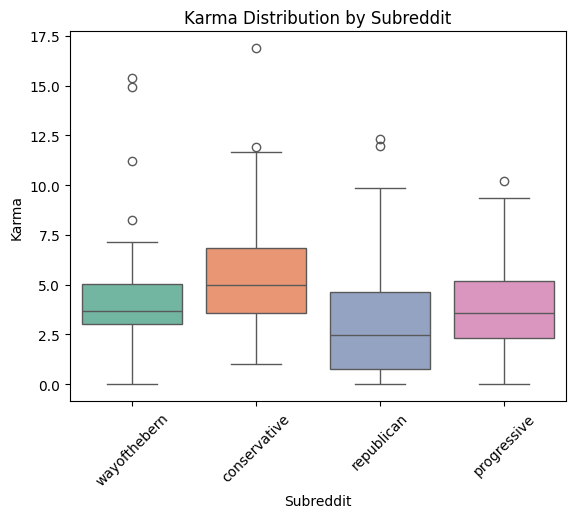

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

filtered_group["karma"] = np.log2(filtered_group["karma"])
sns.boxplot(x="subreddit", y="karma", data=filtered_group, palette="Set2")

# Customize the plot
plt.title("Karma Distribution by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Karma")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11476\1533611477.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=filtered_group, x="karma", hue="subreddit", shade=True, common_norm=False)


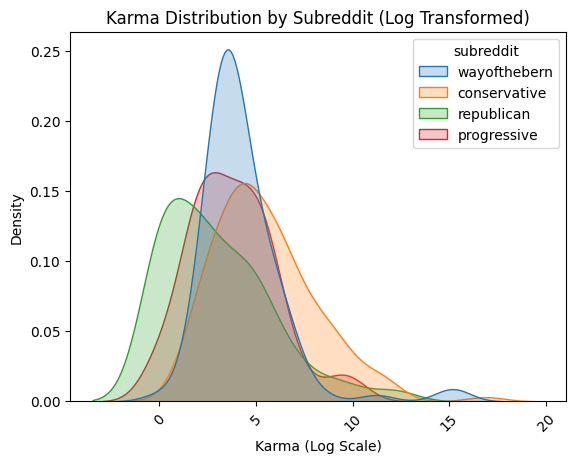

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming filtered_group is a pandas DataFrame that contains 'karma' and 'subreddit' columns

# Apply the log transformation to 'karma'

# Create the density plot (KDE) grouped by subreddit
sns.kdeplot(data=filtered_group, x="karma", hue="subreddit", shade=True, common_norm=False)

# Customize the plot
plt.title("Karma Distribution by Subreddit (Log Transformed)")
plt.xlabel("Karma (Log Scale)")
plt.ylabel("Density")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


In [ ]:
member_counts = {"republican": 206000, "conservative": 1000000, "progressive": 78000, "wayofthebern": 88000}

In [6]:
unique_subreddits = list(data["subreddit"].unique())

with open("unique_subreddits.txt", "w") as file:
    for subreddit in unique_subreddits:
        file.write(f"{subreddit}\n")

In [100]:
relevant_columns = ["subreddit", "karma", "label", "selftext", "author_fullname", "title", "name", "subreddit_type", "created", "author"]
bias_columns = ["bias_sanctity","bias_loyalty","bias_fairness","bias_care","bias_authority"]
intensity_columns = ["intensity_sanctity","intensity_loyalty","intensity_fairness","intensity_care","intensity_authority"]
numerical = ["karma"]
columns = relevant_columns + bias_columns + intensity_columns

In [101]:
df = data[columns] # whole dataset 
df_politics = df[df["subreddit"].isin(politic_subreddits)] # politics filtered dataset

In [5]:
# merge
import pandas as pd

df1 = pd.read_csv("./data/user_posts.csv")
df2 = pd.read_csv("./data/user_karma.csv")

df = pd.merge(df1, df2, how="left", on=["username", "subreddit"])

df["karma"].isna().sum()


169011

In [112]:
def get_average(df):
    df_grouped = df.groupby("author")
    df_avg = df_grouped[intensity_columns + bias_columns + ["karma"]].mean().reset_index()
    df_avg["label"] = df_grouped["label"].first().reset_index(drop=True)
    
    return df_avg

In [113]:
df_avg = get_average(df)
df_politics_avg = get_average(df_politics)

# Data Quality Check

Data does not present any duplicated values.



In [114]:
df.duplicated().sum()

0

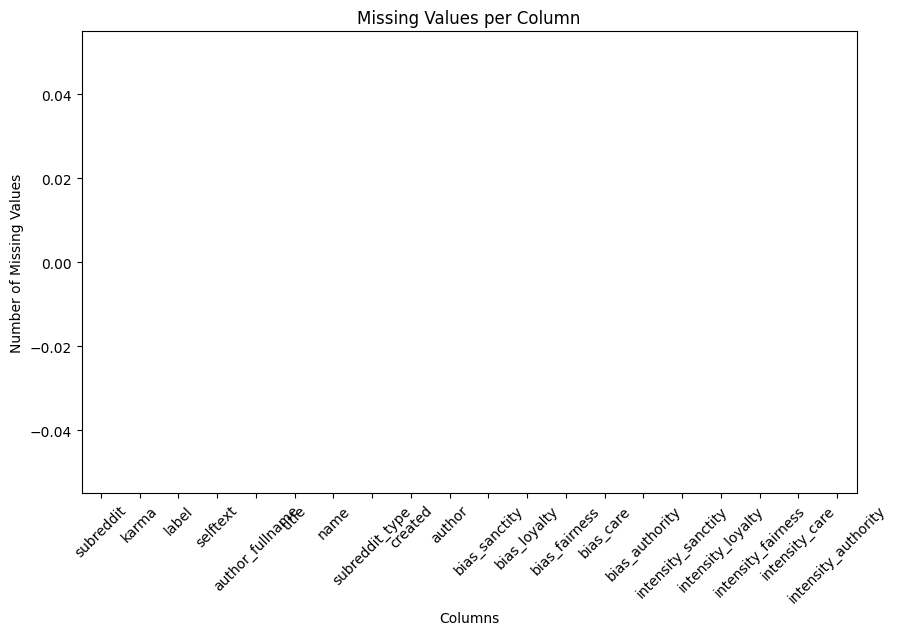

In [115]:
import matplotlib.pyplot as plt

missing_values = df.isna().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()


In [116]:
unique_subreddits = list(data["subreddit"].unique())
with open('unique_values.txt', 'w') as f:
    for value in unique_subreddits:
        f.write(f"{value}\n")

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

def boxplot(df, columns, hue_label, colors):
    # Create a figure and axis to plot
    plt.figure(figsize=(10, 6))

    # Iterate over the columns list and create a boxplot for each column
    for i, col in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)  # Create a subplot for each column
        sns.boxplot(data=df, y=col, hue=hue_label, palette=colors)  # Boxplot for each column with hue
        plt.title(f'{col}')

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [118]:
hue_label = 'label'  # Replace with your actual label column for hue
colors = {'c': 'red', 'd': 'blue'}  # Replace with your categories


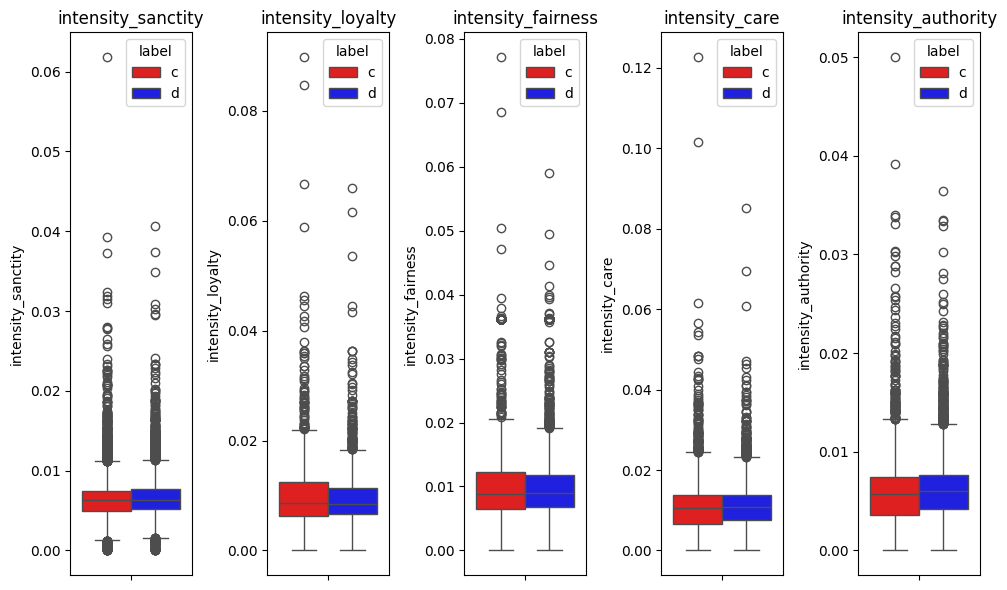

In [119]:
boxplot(df, intensity_columns, hue_label, colors)

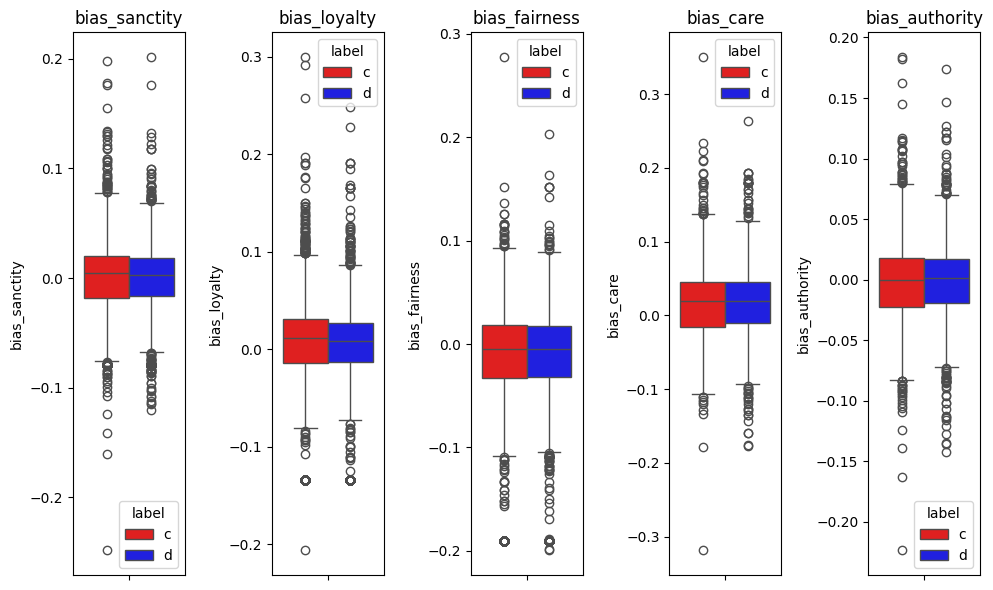

In [120]:
boxplot(df, bias_columns, hue_label, colors)

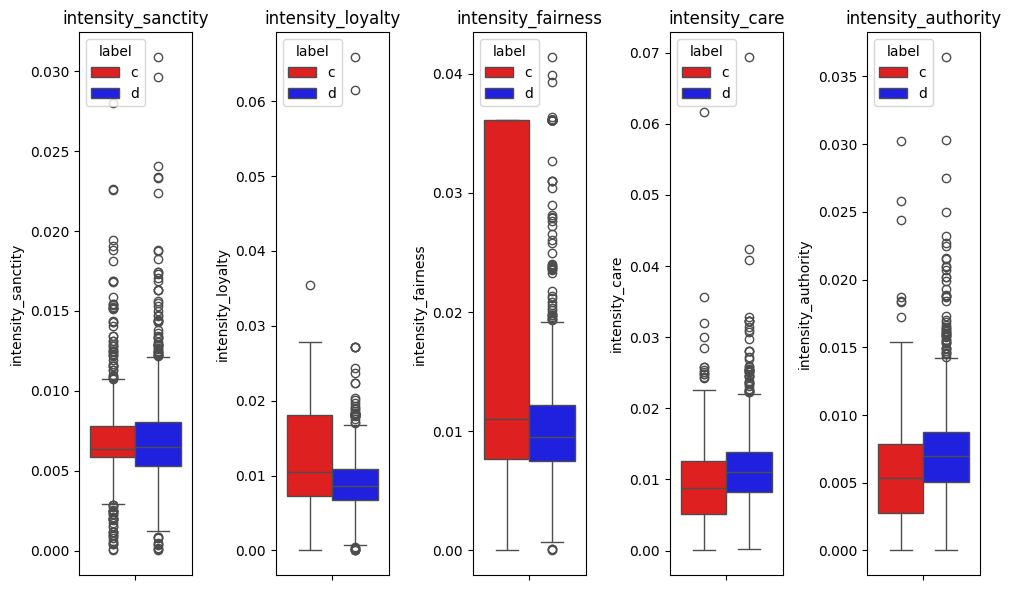

In [121]:
boxplot(df_politics, intensity_columns, hue_label, colors)

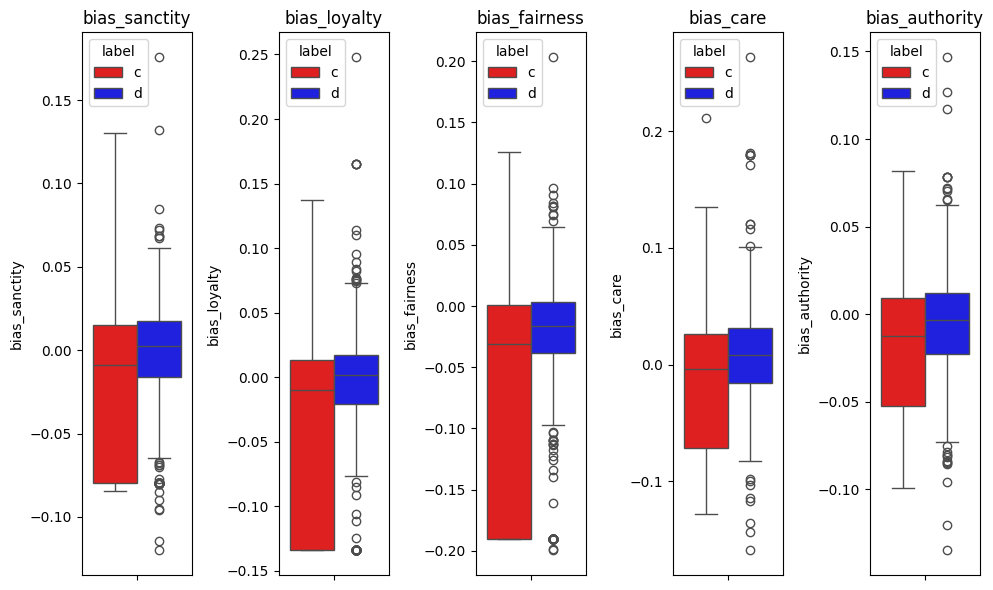

In [122]:
boxplot(df_politics, bias_columns, hue_label, colors)


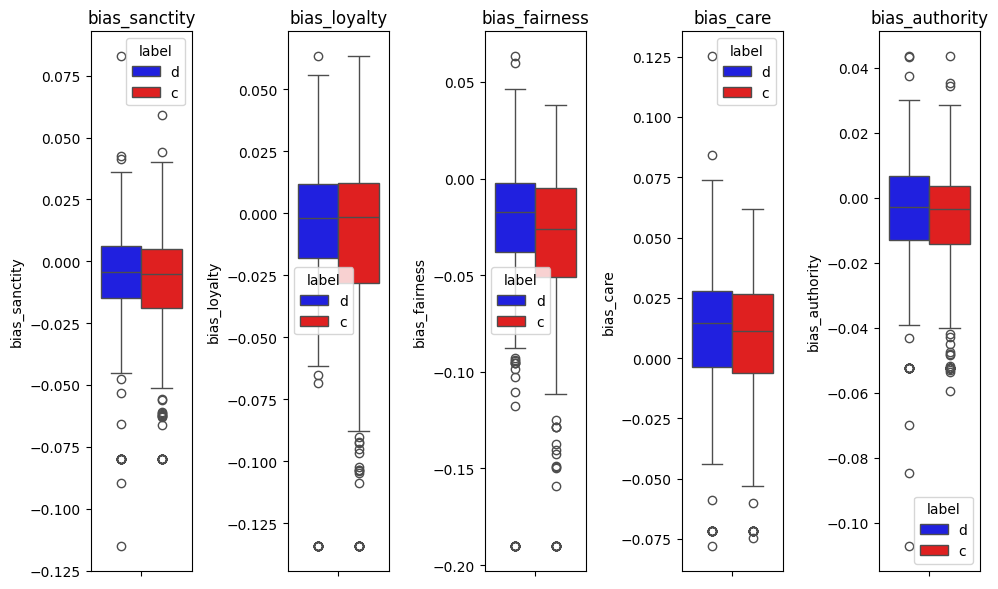

In [ ]:
boxplot(df_avg, bias_columns, hue_label, colors)

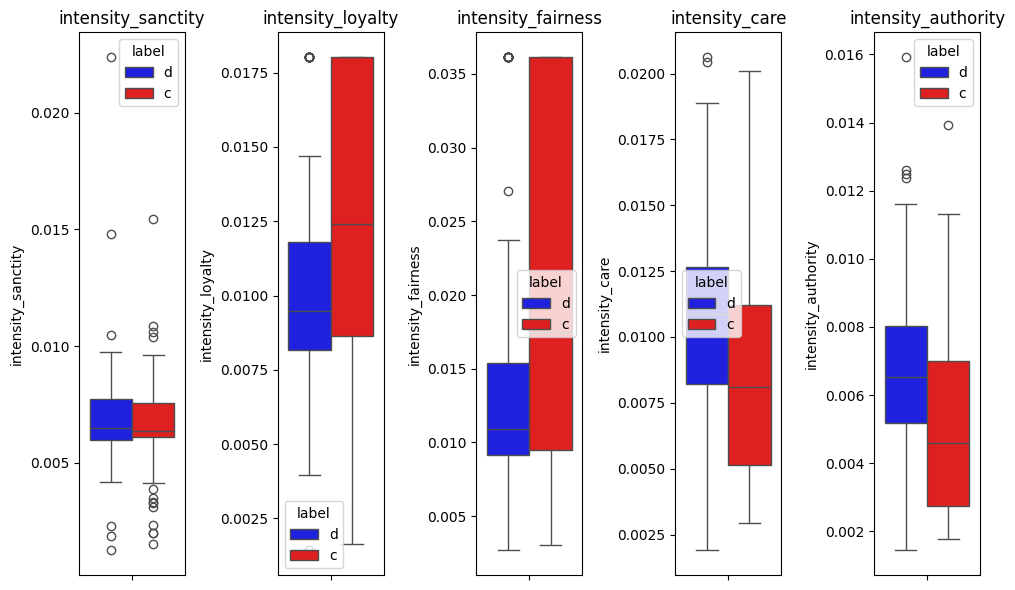

In [125]:
boxplot(df_politics_avg, intensity_columns, hue_label, colors)

todo: 
1. which karma threshold (help us annotate users as cons or liberal) by looking at the distribution of the subreddit
2. visualizations (studying distribution of karma [see 1.], distribution of intensity, bias between the groups)
    
    - boxplots
    - qq-plots
    - pca/tsne
    - distribution of target (barplot)
    - time series nearby elections data
    - data quality (missing values, duplicates)

3. linking the methods to the topics



In [32]:
data["karma"]

KeyError: 'karma'